# Comparaison de performances de SVM et KNN

Les deux algorithmes diffèrent totalement par leur implémentation et leur compléxité. Dans ce notebook, on compare leur performance sur la bdd CIFAR-10.

## IMPORTS
On charge la base CIFAR-10 à partir de la lib KERAS. On définit notre *training set*, *test set* sur un nombre limité d'images.

In [7]:

import os
import time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
#charger CIFAR a partir de keras
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)


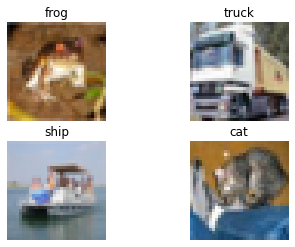

In [3]:
# afficher quelques images
plt.subplot(221)
plt.imshow(xTrain[0].astype(np.int))
plt.axis('off')
plt.title(classesName[yTrain[0]])
plt.subplot(222)
plt.imshow(xTrain[1].astype(np.int))
plt.axis('off')
plt.title(classesName[yTrain[1]])
plt.subplot(223)
plt.imshow(xVal[0].astype(np.int))
plt.axis('off')
plt.title(classesName[yVal[0]])
plt.subplot(224)
plt.imshow(xTest[0].astype(np.int))
plt.axis('off')
plt.title('cat')
plt.show()

## Redimensionnement des images en vecteurs

In [4]:
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) 
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))


#Choosing a smaller dataset
xTrain=xTrain[:3000,:]
yTrain=yTrain[:3000]


## Implémentations 
SVM prenant le paramètre c *taux d'apprentissage* et KNN prenant k *k plus proches voisins*


In [5]:
def svm_linear(c):
    svc = svm.SVC(C = c)
    
    svc.fit(xTrain, yTrain) 
    # Find the prediction and accuracy on the training set.
    
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == yTrain)
    acc_train_svm_linear.append(acc_train)
    print('Précision des prédictions SVM : {:.2%}'.format(acc_train))
    

def knn_fnc(k):
    knn =  KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(xTrain, yTrain) 
    # Find the prediction and accuracy on the training set.
    
    Yhat_knn_train = knn.predict(xTrain)
    acc_train = np.mean(Yhat_knn_train == yTrain)
    acc_train_knn.append(acc_train)
    print('Précision des prédictions KNN :{:.2%}'.format(acc_train))


## plot des performances des deux algorithmes en fonction de leurs parametre respectif 

In [11]:
c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
c_svm_linear_str = ["0.0001","0.001","0.01","0.1","1","10","100"]
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
acc_train_svm_linear = []
acc_train_knn = []

for c in c_svm_linear:
    svm_linear(c)
for k in k_choices:
    knn_fnc(k)



Précision des prédictions SVM : 10.73%
Précision des prédictions SVM : 10.73%
Précision des prédictions SVM : 10.73%
Précision des prédictions SVM : 38.20%
Précision des prédictions SVM : 73.33%
Précision des prédictions SVM : 99.93%
Précision des prédictions SVM : 100.00%
Précision des prédictions KNN :100.00%
Précision des prédictions KNN :50.87%
Précision des prédictions KNN :42.67%
Précision des prédictions KNN :37.50%
Précision des prédictions KNN :36.03%
Précision des prédictions KNN :35.33%
Précision des prédictions KNN :33.47%
Précision des prédictions KNN :32.47%
Précision des prédictions KNN :28.37%
Précision des prédictions KNN :26.87%


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ticks'

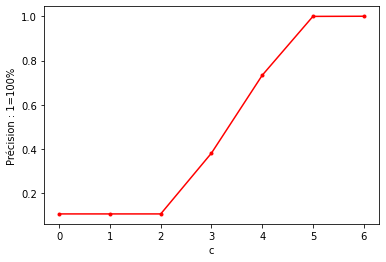

In [27]:
#plt.subplot(2,1,1)
plt.plot(np.arange(7), acc_train_svm_linear,'.-',color='red', label='SVM')
plt.xlabel('c')
plt.ylabel('Précision : 1=100%')
plt.xticks(np.arange(7))
plt.set_ticklabels(np.arange(7)) 

plt.grid()
plt.title("SVM: précision en fonction du facteur C")

plt.legend()
plt.show()
#plt.subplot(2,1,2)
plt.plot(k_choices, acc_train_knn,'.-',color='orange',label='KNN')
plt.xlabel('k')
plt.ylabel('Précision : 1=100%')
plt.legend()
plt.title("KNN: précision en fonction du facteur K")
plt.grid()
plt.show()

## Conclusion
On remarque que les performances maximales, en prenant compte de leurs paramètres respectifs, des deux algorithmes sur la base de données CIFAR-10 sont égales.
En effet, c'est la nature du dataset (nombre d'échantillons, nombre de signatures, etc...) et du problèmes qui déterminent quel algorithme choisir pour le problème de classification.
